In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [3]:
### EDA

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
### See the distribution of the churn values
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
### Cols with binary values
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
        
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

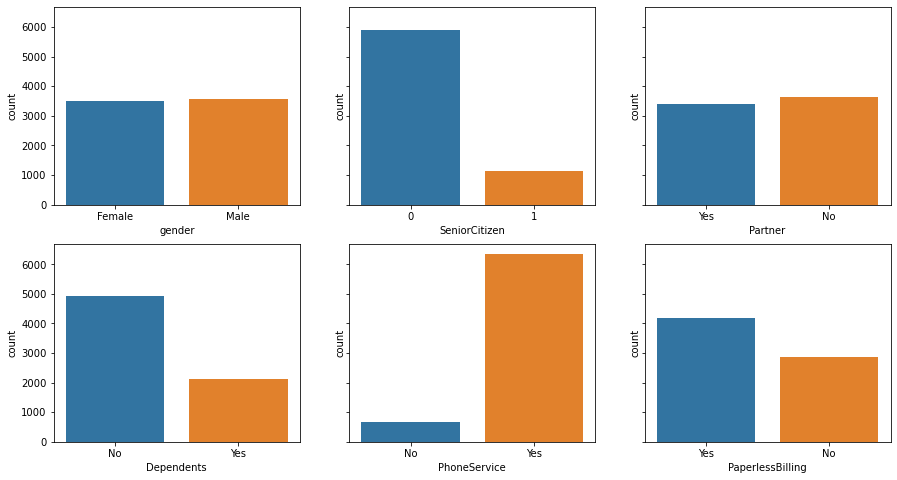

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

In [9]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [10]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [11]:
### Average churn rate for males and females are approx. the same thus gender variable does not bring a valuable prediction.
### Cheking for other columns

print(df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())
print(df[['Partner','Churn']].groupby(['Partner']).mean())
print(df[['Dependents','Churn']].groupby(['Dependents']).mean())
print(df[['PhoneService','Churn']].groupby(['PhoneService']).mean())
print(df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean())

                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
            Churn
Partner          
No       0.329580
Yes      0.196649
               Churn
Dependents          
No          0.312791
Yes         0.154502
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
                     Churn
PaperlessBilling          
No                0.163301
Yes               0.335651


In [12]:
### Using pivot table to check relation between columns and tagert attribute
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

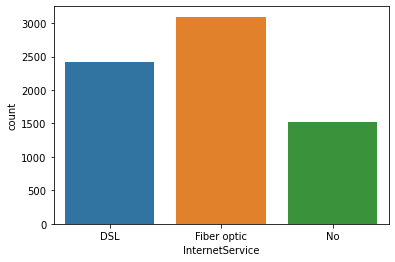

In [13]:
### Multi-categorical dt
sns.countplot("InternetService", data=df)

In [14]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

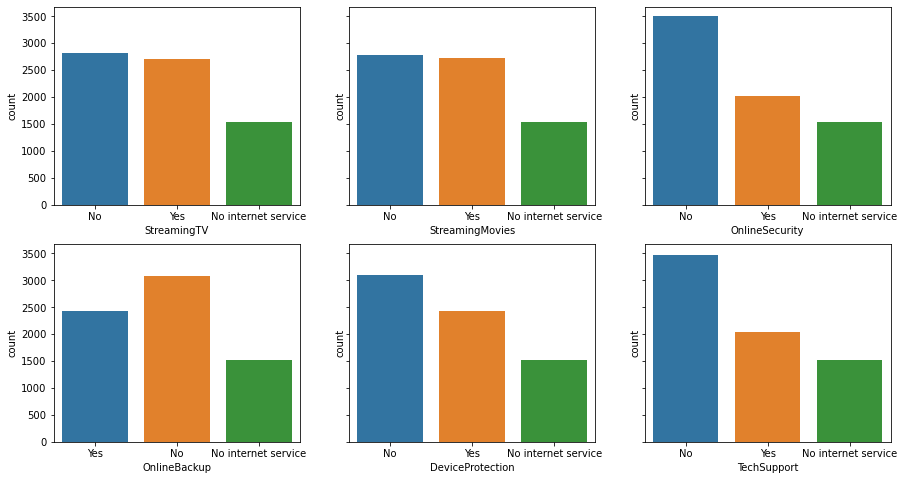

In [15]:
### Other Categorical data

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [16]:
print(df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean())
print(df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean())
print(df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean())
print(df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean())
print(df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean())
print(df[['TechSupport','Churn']].groupby(['TechSupport']).mean())

                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315
                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021
                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663


In [17]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [18]:
### MultipleLines column includes more specific data compared to PhoneService column
### Not include PhoneService column
### Multipleline vs churn 
print(df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean())

                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

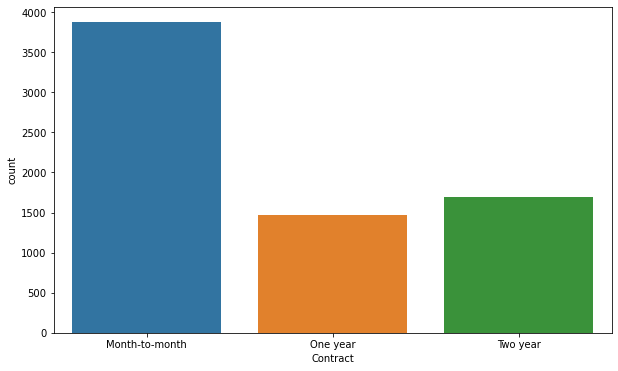

In [19]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)

In [20]:
print(df[['Contract','Churn']].groupby(['Contract']).mean())

                   Churn
Contract                
Month-to-month  0.427097
One year        0.112695
Two year        0.028319


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

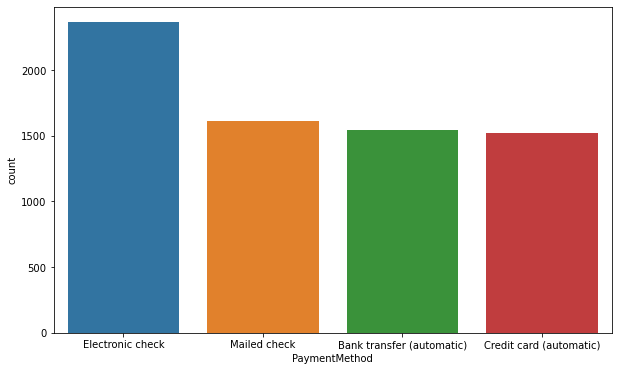

In [21]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)

In [22]:
print(df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean())

                              Churn
PaymentMethod                      
Bank transfer (automatic)  0.167098
Credit card (automatic)    0.152431
Electronic check           0.452854
Mailed check               0.191067


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

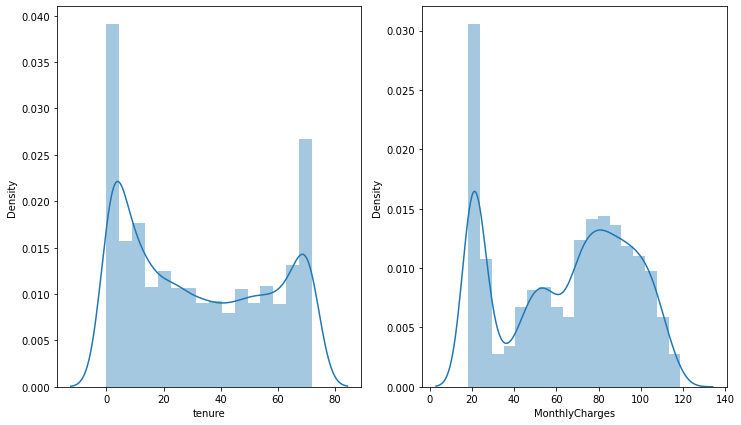

In [23]:
### Continues features
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

In [24]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [25]:
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


In [26]:
### Finally droping cols who dont play a significant role in predicting the churn
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [27]:
### DATA PREPROCESSING

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [29]:
### Categorical to numerical
cat_features = ['SeniorCitizen', 'Partner', 'Dependents','MultipleLines', 'InternetService','OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling',
                'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [30]:
### Scaling continuous variables
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [31]:
X.head(10)

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5,0.111111,0.809950,1,0,0,0,0,1,1,0,...,0,0,0,1,0,1,1,0,1,0
6,0.305556,0.704975,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0
7,0.138889,0.114428,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0.388889,0.861194,1,0,1,0,0,1,1,0,...,0,1,0,1,0,1,1,0,1,0
9,0.861111,0.377114,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X.describe()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.265370,0.162147,0.483033,0.299588,0.096834,0.421837,0.439585,0.216669,...,0.216669,0.290217,0.216669,0.384353,0.216669,0.387903,0.592219,0.216101,0.335794,0.228880
std,0.341104,0.299403,0.441561,0.368612,0.499748,0.458110,0.295752,0.493888,0.496372,0.412004,...,0.412004,0.453895,0.412004,0.486477,0.412004,0.487307,0.491457,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.402778,0.518408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.763889,0.712438,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution Before Resampling')

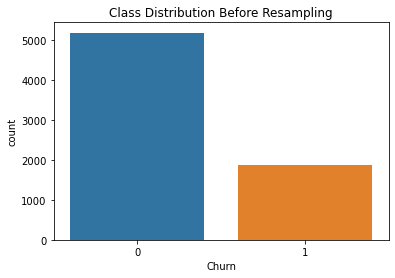

In [33]:
### Resampling
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [34]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [35]:
### Up-sampling +ve records
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

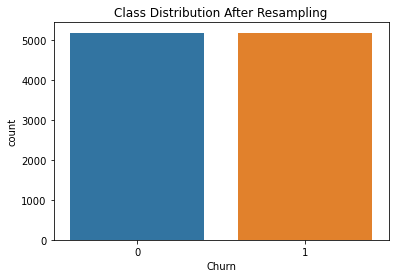

In [36]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [37]:
### Model Creation and Evaluation

In [38]:
### Spliting data into train and test data set
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1)
y = X_upsampled['Churn'] 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [40]:
### KNN & pipe-KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

KNN = KNeighborsClassifier(9)

#pipe_KNN = make_pipeline(df,KNN)
KNN.fit(X_train,y_train)

pred = KNN.predict(X_train)
print("Accuracy on training data",accuracy_score(y_train, pred))

pred_test = KNN.predict(X_test)
print("Accuracy on testing data",accuracy_score(y_test, pred_test))

NameError: name 'accuracy_score' is not defined

In [ ]:
### Using Ridge classifier

from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

clf_ridge = RidgeClassifier() 
clf_ridge.fit(X_train, y_train)

pred = clf_ridge.predict(X_train)
print("Accuracy on training data",accuracy_score(y_train, pred))

pred_test = clf_ridge.predict(X_test)
print("Accuracy on testing data",accuracy_score(y_test, pred_test))

In [ ]:
### Using Random forest

from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

pred = clf_forest.predict(X_train)
print("Accuracy on training data",accuracy_score(y_train, pred))

pred_test = clf_forest.predict(X_test)
print("Accuracy on testing data",accuracy_score(y_test, pred_test))

In [ ]:
### GRID-SEARCH-CV

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

clf.fit(X, y)

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

In [ ]:
### Mean cross-validated score of the best_estimator.